In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
movies_df = pd.read_csv("/content/movies.csv")
ratings_df = pd.read_csv("/content/ratings.csv")

In [3]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1.112486e+09
1,1,29,3.5,1.112485e+09
2,1,32,3.5,1.112485e+09
3,1,47,3.5,1.112485e+09
4,1,50,3.5,1.112485e+09


In [4]:
ratings_df=ratings_df.drop(columns="timestamp",axis=1)

In [ ]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96198 entries, 0 to 96197
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   userId   96198 non-null  int64  
 1   movieId  96198 non-null  int64  
 2   rating   96198 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.2 MB


In [6]:
#to claculate number of users
users=ratings_df['userId'].nunique()
users

668

In [7]:
#get the users count with NaN values
movie_count=ratings_df.isnull().sum()
movie_count

userId     0
movieId    0
rating     0
dtype: int64

In [8]:
ratings=ratings_df['rating'].count()
ratings

96198

In [9]:
#To find out how many people have rated the movies as 1, 2, 3,4,5 stars ratings to the movies
stars=ratings_df.groupby('rating')['rating'].agg(['count'])
stars

,count
rating,
0.5,1135
1.0,3426
1.5,1476
2.0,7266
2.5,3948
3.0,22038
3.5,9498
4.0,26329
4.5,7166


In [10]:
movies=ratings_df["movieId"].nunique()
movies

8177

Text(0.5, 1.0, 'Total pool: 8177 Movies, 668 Users, 96198 Ratings given')

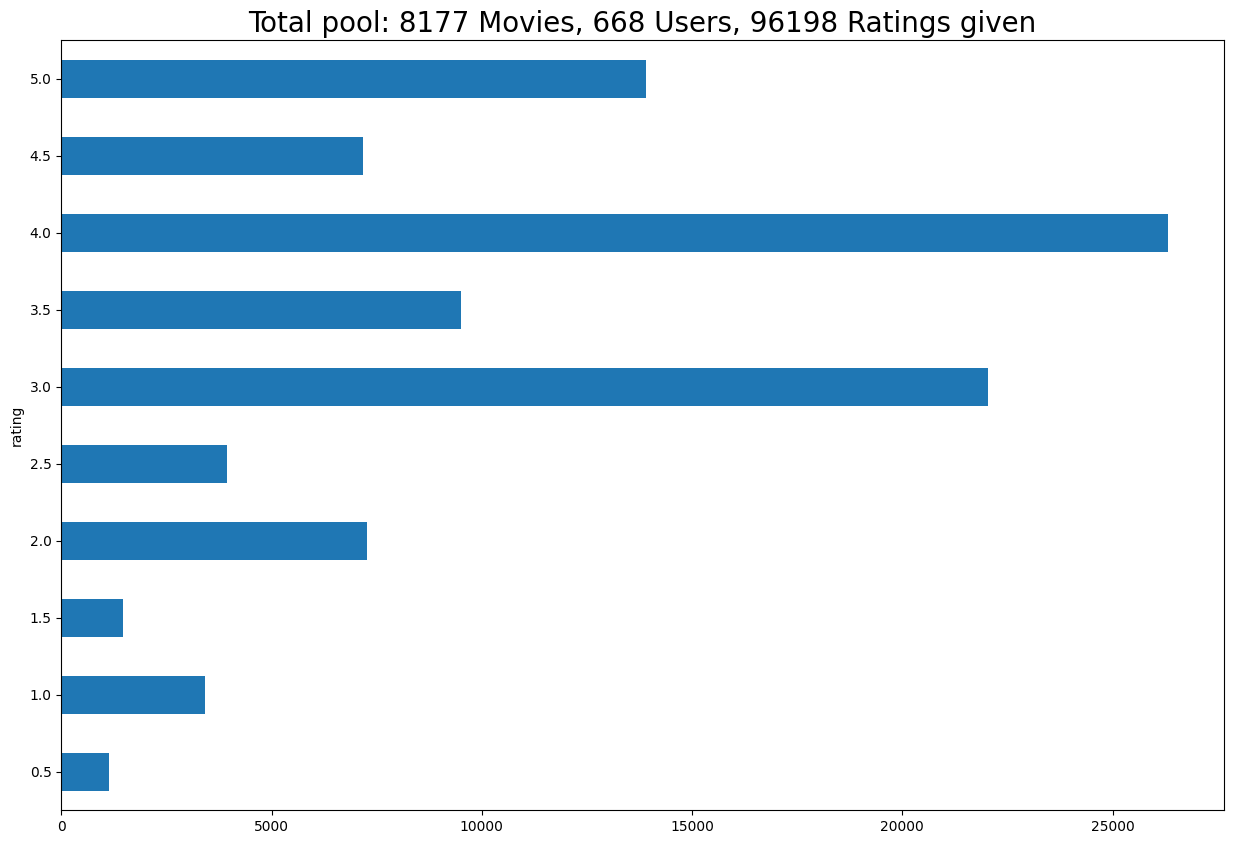

In [11]:
ax=stars.plot(kind='barh', legend=False, figsize=(15,10))
plt.title(f'Total pool: {movies} Movies, {users} Users, {ratings} Ratings given', fontsize=20)

In [12]:
#now we will remove all the users that have rated less movies and
#also all those movies that has been rated less in numbers
f=['count','mean']

In [13]:
movie_summary=ratings_df.groupby('movieId')['rating'].agg(f)
movie_summary

,count,mean
movieId,,
1,226,3.984513
2,102,3.254902
3,59,3.279661
4,13,3.384615
5,63,3.309524
...,...,...
118900,1,4.000000
118997,1,3.000000
119141,2,2.750000


In [14]:
movie_summary['count'].quantile(0.7)

8.0

In [15]:
#now we will create a benchmark
movie_benchmark=round(movie_summary['count'].quantile(0.7))
movie_benchmark

8

In [16]:
drop_movie_list=movie_summary[movie_summary['count']<movie_benchmark].index
drop_movie_list

Int64Index([    26,     30,     35,     37,     38,     40,     49,     54,
                55,     59,
            ...
            117176, 117511, 117590, 118354, 118696, 118900, 118997, 119141,
            125916, 128488],
           dtype='int64', name='movieId', length=5674)

In [17]:
#now we will remove all the users that are in-active
user_summary=ratings_df.groupby('userId')['rating'].agg(f)
user_summary

,count,mean
userId,,
1,175,3.742857
2,61,4.000000
3,187,4.122995
4,28,3.571429
5,66,4.272727
...,...,...
664,429,4.177156
665,162,3.487654
666,68,3.897059


In [18]:
user_benchmark=round(user_summary['count'].quantile(0.7),0)
user_benchmark

127.0

In [19]:
drop_user_list=user_summary[user_summary['count']<user_benchmark].index
drop_user_list

Int64Index([  2,   4,   5,   6,   8,   9,  10,  12,  13,  15,
            ...
            653, 654, 655, 656, 657, 658, 660, 666, 667, 668],
           dtype='int64', name='userId', length=467)

In [20]:
#we will remove all the customers and movies that are below the benchmark
ratings_df=ratings_df[~ratings_df['movieId'].isin(drop_movie_list)]
ratings_df=ratings_df[~ratings_df['userId'].isin(drop_user_list)]
print('After the triming, the shape is: {}'.format(ratings_df.shape))

After the triming, the shape is: (58877, 3)


In [21]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [22]:
movies_df.set_index('movieId', inplace=True)

In [23]:
movies_df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [24]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162672 sha256=86ec7c494d084c880cf45dac017a4659cf05652e682680b3761095f66ea8a681
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [25]:
#model building
import math
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [26]:
#help us to read the dataset for svd algo
reader=Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']][:100000], reader)

# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.8843  0.8957  0.8918  0.8906  0.0048  
MAE (testset)     0.6851  0.6908  0.6904  0.6888  0.0026  
Fit time          0.66    0.71    0.72    0.70    0.03    
Test time         0.12    0.27    0.14    0.18    0.06    


{'test_rmse': array([0.88425417, 0.8957466 , 0.89176069]),
 'test_mae': array([0.6851184 , 0.69084889, 0.69041957]),
 'fit_time': (0.6575667858123779, 0.7060871124267578, 0.7234823703765869),
 'test_time': (0.11803221702575684, 0.26535534858703613, 0.1424250602722168)}

In [27]:
ratings_df.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [28]:
ratings_1 = ratings_df[(ratings_df['userId'] == 1) & (ratings_df['rating'] >= 4)]
ratings_1 = ratings_1.set_index('movieId')
ratings_1 = ratings_1.join(movies_df)['title']
ratings_1.head(10)

movieId
151                                        Rob Roy (1995)
223                                         Clerks (1994)
253     Interview with the Vampire: The Vampire Chroni...
260             Star Wars: Episode IV - A New Hope (1977)
293     Léon: The Professional (a.k.a. The Professiona...
296                                   Pulp Fiction (1994)
318                      Shawshank Redemption, The (1994)
541                                   Blade Runner (1982)
1036                                      Die Hard (1988)
1079                          Fish Called Wanda, A (1988)
Name: title, dtype: object

In [29]:
# Create a shallow copy for the movies dataset
user_1 = movies_df.copy()

#Reset the index for user_1 dataset
user_1 = user_1.reset_index()

user_1=user_1[~user_1['movieId'].isin(drop_movie_list)]

user_1['Estimate_Score']=user_1['movieId'].apply(lambda x: svd.predict(1, x).est)
user_1=user_1.drop('movieId', axis=1)

user_1=user_1.sort_values('Estimate_Score', ascending=False)
print(user_1.head(10))

                                                  title  \
1195                     Godfather: Part II, The (1974)   
887                                  Rear Window (1954)   
4877  Amelie (Fabuleux destin d'Amélie Poulain, Le) ...   
7041  Lord of the Rings: The Return of the King, The...   
5917                City of God (Cidade de Deus) (2002)   
765                                Trainspotting (1996)   
1564                           L.A. Confidential (1997)   
315                    Shawshank Redemption, The (1994)   
4897  Lord of the Rings: The Fellowship of the Ring,...   
1224                                   Chinatown (1974)   

                                     genres  Estimate_Score  
1195                            Crime|Drama        4.480704  
887                        Mystery|Thriller        4.451559  
4877                         Comedy|Romance        4.418526  
7041         Action|Adventure|Drama|Fantasy        4.409899  
5917  Action|Adventure|Crime|Drama|Thril

Alternative approach

In [33]:
user_one=movies_df.copy()

user_one=user_one.reset_index()

user_one=user_one[~user_one['movieId'].isin(drop_movie_list)]

# getting full dataset
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

#create a training set for svd
trainset = data.build_full_trainset()
svd.fit(trainset)

#Predict the ratings for user1
user_one['Estimate_Score'] = user_one['movieId'].apply(lambda x: svd.predict(1, x).est)

#Drop extra columns from the user1 data frame
user_one =user_one.drop(['movieId'], axis = 1)

# Sort predicted ratings for user1 in descending order
user_one = user_one.sort_values('Estimate_Score', ascending=False)

#Print top 10 recommendations
print(user_one.head(10))

                                                   title  \
4897   Lord of the Rings: The Fellowship of the Ring,...   
315                     Shawshank Redemption, The (1994)   
7041   Lord of the Rings: The Return of the King, The...   
5853       Lord of the Rings: The Two Towers, The (2002)   
2486                                  Matrix, The (1999)   
12525                            Dark Knight, The (2008)   
1224                                    Chinatown (1974)   
887                                   Rear Window (1954)   
1195                      Godfather: Part II, The (1974)   
3855                          Requiem for a Dream (2000)   

                                 genres  Estimate_Score  
4897                  Adventure|Fantasy        4.641419  
315                         Crime|Drama        4.617412  
7041     Action|Adventure|Drama|Fantasy        4.595739  
5853                  Adventure|Fantasy        4.516890  
2486             Action|Sci-Fi|Thriller        4.